# **Identifikasi Faktor Dominan yang Mempengaruhi Ketimpangan Life Expectancy antar Negara Berpendapatan Tinggi dan Rendah Periode 2000-2019**




# **Import Library**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Business Understanding**

## **Business Objective**
Meskipun rata-rata Life Expectancy dunia meningkat dalam dua dekade terakhir, masih terdapat ketimpangan signifikan antara negara berpendapatan tinggi dengan negara berpendapatan rendah.

Tujuan analisis ini adalah mengidentifikasi faktor sosial ekonomi yang paling dominan dalam mempengaruhi ketimpangan Life Expectancy tersebut.


## **Assess Situation**

Dataset yang digunakan mencakup banyak negara dalam periode waktu 2000–2019. Karena data tersedia selama beberapa tahun, analisis dapat dilakukan untuk melihat perkembangan dari waktu ke waktu.

Beberapa tantangan yang mungkin dihadapi dan perlu diperhatikan:

- **Terdapat data yang kosong (missing values).**
Beberapa variabel memiliki nilai yang tidak lengkap. Hal ini perlu ditangani agar hasil analisis tidak menjadi bias atau kurang akurat.

- **Perbedaan skala antar variabel.**
Setiap variabel memiliki rentang nilai yang berbeda.
Misalnya, nilai emisi CO₂ bisa sangat besar, sementara nilai pengangguran atau korupsi berada dalam rentang yang lebih kecil.
Perbedaan ini perlu diperhatikan terutama saat melakukan analisis statistik atau modeling.

- **Perlu pengelompokan berdasarkan tingkat pendapatan.**
Karena ini berfokus pada perbandingan negara berpendapatan tinggi dan rendah, maka data perlu dikelompokkan sesuai kategori Income Group.

- **Kemungkinan terdapat nilai ekstrem (outlier).**
Beberapa negara mungkin memiliki nilai yang jauh berbeda dari mayoritas data. Nilai ekstrem ini perlu diperiksa karena dapat memengaruhi hasil analisis.

## **Analytic Goals**

Analisis yang akan dilakukan meliputi:

1. Analisis deskriptif Life Expectancy
2. Perbandingan Life Expectancy antar kelompok pendapatan
3. Analisis korelasi variabel sosial ekonomi
4. Pembangunan model regresi
5. Identifikasi faktor dominan


## **Project Plan**

Tahapan yang akan dilakukan:

1. Data Understanding
2. Data Preparation
3. Exploratory Data Analysis (EDA)
4. Modeling
5. Evaluation


# **Data Understanding**

## **Memuat Dataset**

Dataset yang digunakan merupakan data Life Expectancy dan indikator sosial ekonomi dari berbagai negara periode 2000–2019 yang bersumber dari World Bank melalui Kaggle.

In [3]:
path = "/content/drive/MyDrive/Dataset avd/Checkpoint/life expectancy.csv"
df = pd.read_csv(path)

df

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.45870,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.000000,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.77788,1.801000,3.0,NaN,12484.18,26032.56,69213.56
3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.70625,8.406000,4.0,47.698788,6652.84,9095.19,43798.62
3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.91771,28.469999,NaN,NaN,3174676.10,13198944.71,10214261.89
3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,NaN,6800.000191,5.312203,4.46518,12.520000,2.5,NaN,510982.75,4837094.00,2649687.82


## **Deskripsi Data**

### **Informasi Lanjutan**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country Name                    3306 non-null   object 
 1   Country Code                    3306 non-null   object 
 2   Region                          3306 non-null   object 
 3   IncomeGroup                     3306 non-null   object 
 4   Year                            3306 non-null   int64  
 5   Life Expectancy World Bank      3118 non-null   float64
 6   Prevelance of Undernourishment  2622 non-null   float64
 7   CO2                             3154 non-null   float64
 8   Health Expenditure %            3126 non-null   float64
 9   Education Expenditure %         2216 non-null   float64
 10  Unemployment                    3002 non-null   float64
 11  Corruption                      975 non-null    float64
 12  Sanitation                      20

In [37]:
df.shape

(3306, 16)

Berdasarkan data di atas, dapat diketahui bahwa:

- Dataset memiliki 3306 baris dan 16 kolom.
- Beberapa kolom memiliki nilai yang tidak lengkap (terdapat missing values).
- Tipe data terdiri dari object (teks), int64 (angka bulat), dan float64 (angka desimal).

### **Informasi Statistik Deskriptif**

In [38]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [39]:
df.describe(include='all')

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306,3306,3306,3306,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
unique,174,174,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,19,19,893,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,NaN,NaN,NaN,NaN,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,NaN,NaN,NaN,NaN,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,NaN,NaN,NaN,NaN,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,NaN,NaN,NaN,NaN,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,NaN,NaN,NaN,NaN,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06


Berdasarkan statistik deskriptif terlihat bahwa:

- Nilai minimum Life Expectancy adalah sekitar 40 tahun, sedangkan nilai maksimum mencapai lebih dari 84 tahun. Hal ini menunjukkan adanya kesenjangan harapan hidup yang sangat besar antar negara.

- Variabel Prevalence of Undernourishment memiliki nilai maksimum yang cukup tinggi (70%), yang menunjukkan masih adanya negara dengan tingkat kekurangan gizi ekstrem.

- Perbedaan nilai minimum dan maksimum yang sangat besar pada variabel CO2 dan Injuries mengindikasikan adanya ketimpangan pembangunan antar negara.

- Median Life Expectancy (72.16) lebih tinggi dari rata-rata (69.74), yang menunjukkan adanya beberapa negara dengan Life Expectancy rendah yang menurunkan nilai rata-rata secara keseluruhan.

# **Verifikasi Kualitas Data**

## **Data Type Check**

In [40]:
df.dtypes

,0
Country Name,object
Country Code,object
Region,object
IncomeGroup,object
Year,int64
Life Expectancy World Bank,float64
Prevelance of Undernourishment,float64
CO2,float64
Health Expenditure %,float64
Education Expenditure %,float64


Berdasarkan data di atas, dapat diketahui bahwa sebagian besar variabel numerik sudah bertipe float64 atau int64 sehingga dapat langsung digunakan untuk analisis statistik. Kolom seperti Country Name, Country Code, Region, dan IncomeGroup bertipe object karena berisi teks.

## **Inconsistent Values**

In [45]:
print(df['IncomeGroup'].unique())

['Low income' 'Lower middle income' 'Upper middle income' 'High income']


In [46]:
print(df['Region'].unique())

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']


Pengecekan nilai unik pada kolom IncomeGroup dan Region bertujuan untuk memastikan tidak terdapat inkonsistensi penulisan kategori.

Nilai pada kolom IncomeGroup dan Region sudah konsisten dan tidak ditemukan perbedaan penulisan kategori. Hal ini menunjukkan tidak terdapat inkonsistensi data pada kolom kategorikal.

## **Missing Values**

In [49]:
df.isna().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
Year,0
Life Expectancy World Bank,188
Prevelance of Undernourishment,684
CO2,152
Health Expenditure %,180
Education Expenditure %,1090


Berdasarkan hasil pengecekan missing values, ditemukan bahwa beberapa kolom memiliki data yang tidak lengkap.

Kolom identitas seperti **Country Name, Country Code, Region, IncomeGroup, dan Year** tidak memiliki missing values, sehingga struktur utama dataset dapat dikatakan lengkap dan konsisten.

Namun, beberapa variabel numerik memiliki jumlah data kosong yang cukup signifikan. Kolom dengan missing values tertinggi adalah:
- Corruption (2331 data kosong)
- Sanitation (1247)
- Education Expenditure % (1090)
- Prevalence of Undernourishment (684)

Jumlah missing value yang besar pada variabel-variabel tersebut berpotensi mempengaruhi hasil analisis jika tidak ditangani dengan tepat. Oleh karena itu, pada tahap Data Preparation diperlukan strategi penanganan seperti imputasi atau seleksi data agar tidak menimbulkan bias dalam pemodelan dan interpretasi hasil.

## **Duplicated Values**

In [50]:
df.duplicated().sum()

np.int64(0)

Berdasarkan hasil pengecekan duplicated values di atas, tidak ditemukan data duplikat dalam dataset. Hal ini berarti setiap baris merepresentasikan kombinasi negara dan tahun yang unik.

## **Outliers Values**

In [7]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year,0.000000
Life Expectancy World Bank,0.604961
Prevelance of Undernourishment,4.537205
CO2,14.216576
Health Expenditure %,1.754386
Education Expenditure %,1.814882
Unemployment,5.565638
Corruption,0.423472
Sanitation,0.000000
Injuries,11.524501


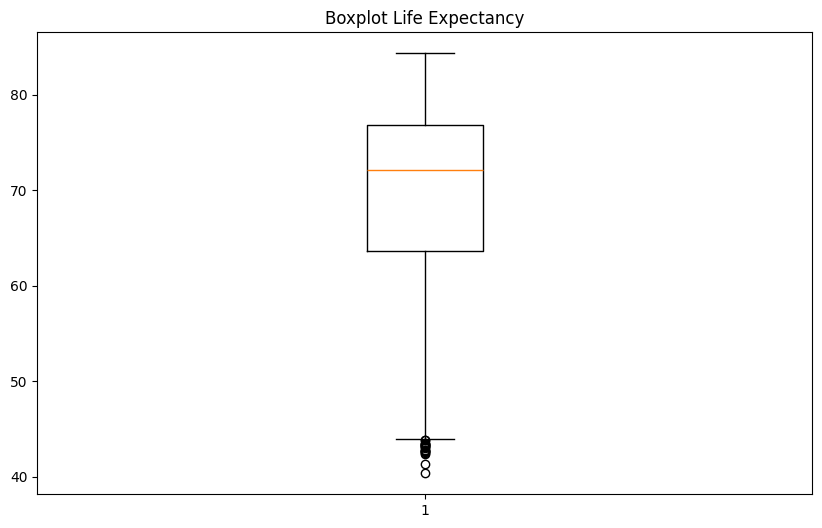

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Life Expectancy World Bank'].dropna())
plt.title('Boxplot Life Expectancy')
plt.show()

Berdasarkan hasil pengecekan di atas, terdapat beberapa nilai yang berada jauh dari sebagian besar data lainnya. Nilai tersebut termasuk dalam kategori outlier karena menyimpang dari pola umum distribusi data.

Keberadaan outlier dapat mempengaruhi hasil analisis, terutama pada perhitungan rata-rata dan interpretasi data, sehingga perlu diperhatikan pada tahap analisis selanjutnya.

# **Exploratory Data Analysis (EDA)**

## **Comparison/Perbandingan**

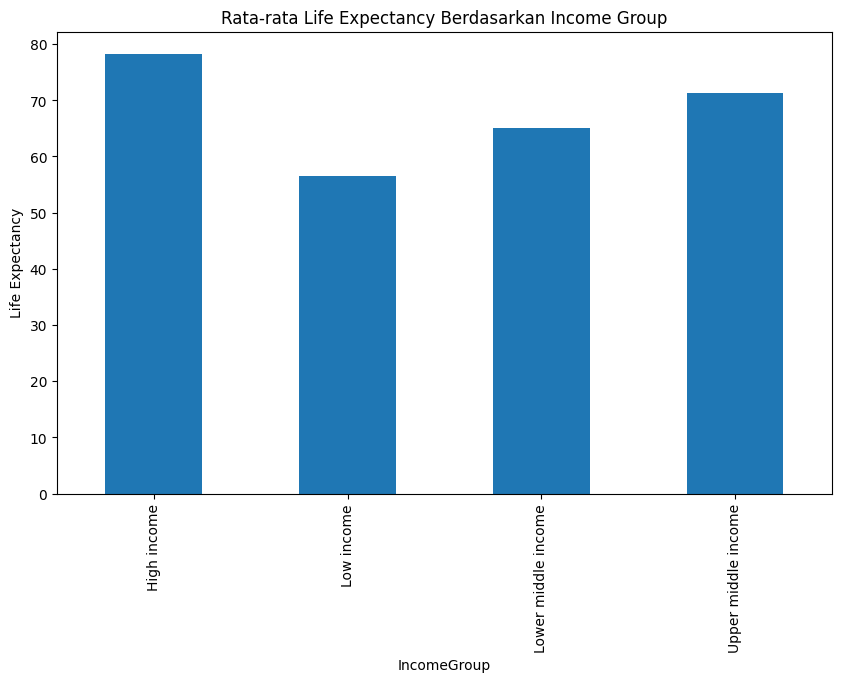

In [51]:
plt.figure(figsize=(10, 6))
df.groupby('IncomeGroup')['Life Expectancy World Bank'].mean().plot(kind='bar')
plt.title('Rata-rata Life Expectancy Berdasarkan Income Group')
plt.ylabel('Life Expectancy')
plt.show()

Hasil perbandingan menunjukkan bahwa negara dengan kategori High Income memiliki rata-rata Life Expectancy yang secara signifikan lebih tinggi dibandingkan kelompok Lower Middle dan Low Income.

Perbedaan ini menunjukkan adanya ketimpangan kesehatan global yang berkaitan dengan perbedaan akses terhadap layanan kesehatan, pendidikan, dan infrastruktur dasar.

## **Composition/Komposisi**

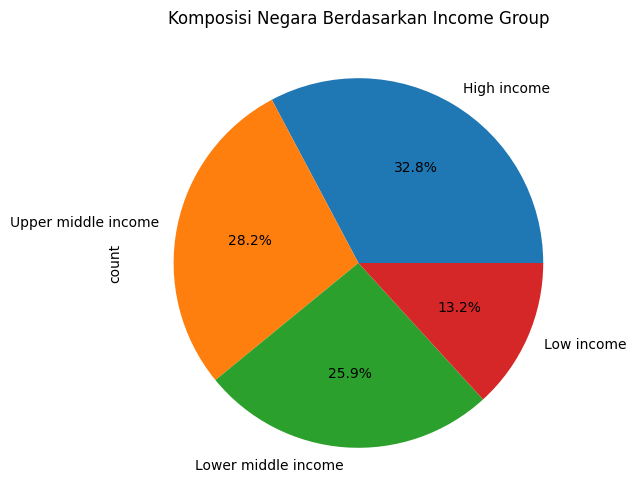

In [52]:
plt.figure(figsize=(10, 6))
df['IncomeGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Komposisi Negara Berdasarkan Income Group')
plt.show()

Distribusi negara berdasarkan Income Group menunjukkan bahwa terdapat kelompok yang jumlahnya lebih dominan dibandingkan kelompok lainnya. Komposisi ini menggambarkan keseimbangan data antar kategori pendapatan dan penting untuk diperhatikan karena dapat mempengaruhi hasil analisis perbandingan antar kelompok.

## **Distribution/Distribusi**

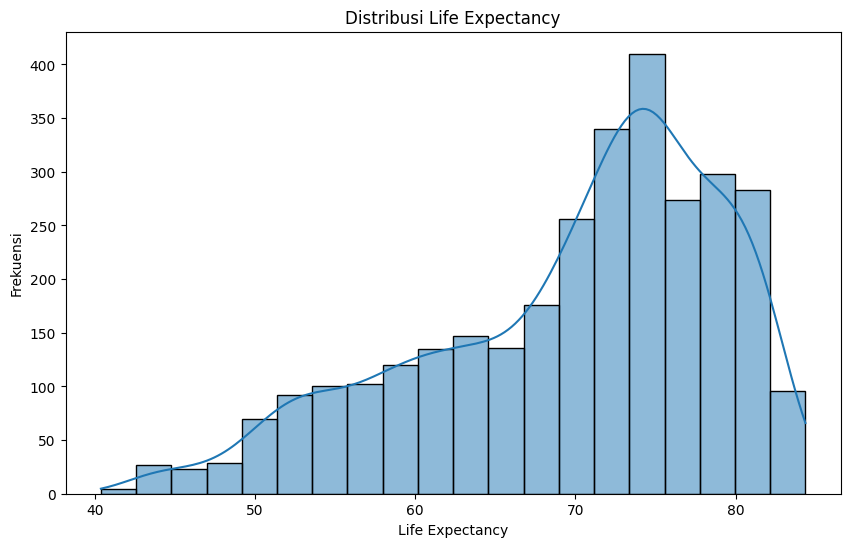

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Expectancy World Bank'], bins=20, kde=True)
plt.title('Distribusi Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frekuensi')
plt.show()

Distribusi Life Expectancy menunjukkan pola cenderung mendekati normal, namun terdapat ekor distribusi di bagian kiri (nilai rendah).
Hal ini menunjukkan adanya sejumlah negara dengan harapan hidup rendah yang berkontribusi terhadap ketimpangan global.
Negara-negara tersebut kemungkinan berada pada kelompok pendapatan rendah dengan keterbatasan akses layanan kesehatan dan sanitasi.

## **Relationship/Hubungan**

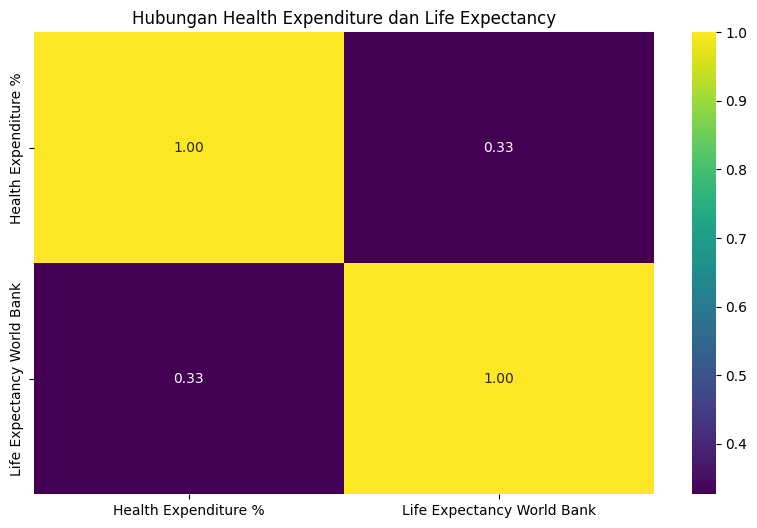

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=df[['Health Expenditure %', 'Life Expectancy World Bank']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Hubungan Health Expenditure dan Life Expectancy')
plt.show()

Berdasarkan heatmap korelasi, nilai koefisien sebesar 0.33 menunjukkan adanya hubungan positif antara Health Expenditure dan Life Expectancy. Hal ini berarti peningkatan pengeluaran kesehatan cenderung diikuti oleh peningkatan angka harapan hidup, namun hubungan tersebut tidak terlalu kuat.

Korelasi yang relatif rendah ini menunjukkan bahwa selain pengeluaran kesehatan, terdapat faktor lain yang turut mempengaruhi angka harapan hidup suatu negara.

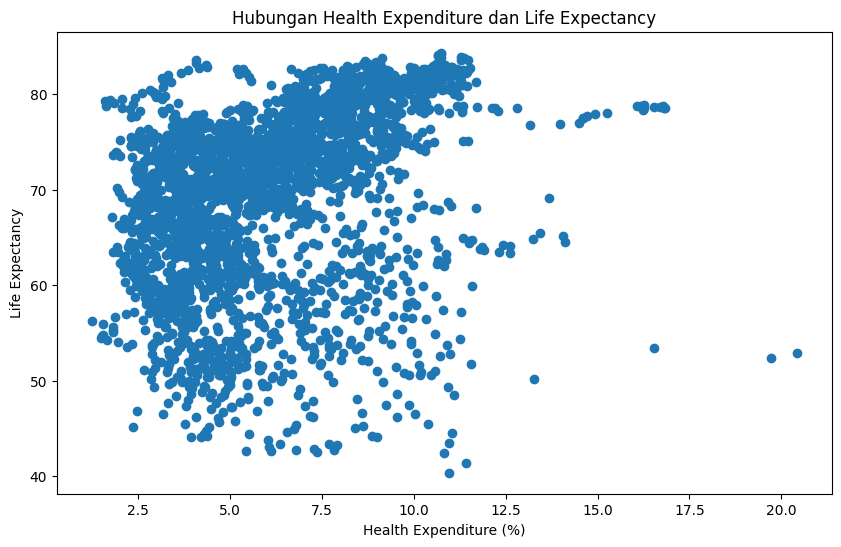

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Health Expenditure %'], df['Life Expectancy World Bank']),
plt.xlabel('Health Expenditure (%)')
plt.ylabel('Life Expectancy')
plt.title('Hubungan Health Expenditure dan Life Expectancy')
plt.show()

Scatter plot menunjukkan adanya kecenderungan hubungan positif antara pengeluaran kesehatan dan angka harapan hidup. Negara dengan pengeluaran kesehatan yang lebih tinggi umumnya memiliki angka harapan hidup yang lebih tinggi.

Namun, pola yang terbentuk tidak sepenuhnya kuat karena masih terlihat penyebaran data yang cukup luas, sehingga menunjukkan bahwa faktor lain juga turut mempengaruhi angka harapan hidup.

# **Menyimpan Dataset**

In [56]:
df.to_csv('/content/drive/MyDrive/Dataset avd/Checkpoint/life expectancy.csv', index=False)